In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Dataset/GameData.csv')
df.head()

,game_title,description,genres
0,Kingdom Come: Deliverance II,Henry is sent to escort Sir Hans Capon on a di...,"['Action', 'Adventure', 'Drama', 'History']"
1,Grand Theft Auto V,Three very different criminals team up for a s...,"['Buddy Comedy', 'Car Action', 'Dark Comedy', ..."
2,God of War,"After wiping out the gods of Mount Olympus, Kr...","['Dark Fantasy', 'Action', 'Adventure', 'Drama..."
3,Mass Effect 2,After being revived from death and having to j...,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa..."
4,Metal Gear Solid 3: Snake Eater,"In 1964, a U.S. government operative codenamed...","['Action', 'Adventure', 'Drama', 'Mystery', 'S..."


In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(6877, 3)

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 122
{'Action': 4151, 'Adventure': 3959, 'Drama': 597, 'History': 150, 'Buddy Comedy': 14, 'Car Action': 18, 'Dark Comedy': 41, 'Gangster': 10, 'Heist': 6, 'Comedy': 795, 'Crime': 409, 'Dark Fantasy': 92, 'Fantasy': 2337, 'Mystery': 882, 'Romance': 176, 'Sci-Fi': 1867, 'Thriller': 643, 'War': 373, 'Sci-Fi Epic': 8, 'Space Sci-Fi': 47, 'Fantasy Epic': 24, 'Spy': 7, 'Adventure Epic': 18, 'Sword & Sorcery': 9, 'Horror': 941, 'Globetrotting Adventure': 6, 'Quest': 23, 'Sea Adventure': 6, 'Swashbuckler': 6, 'Tragedy': 6, 'Western': 59, 'Psychological Thriller': 26, 'Superhero': 160, 'Contemporary Western': 7, 'Alien Invasion': 14, 'Artificial Intelligence': 7, 'Supernatural Fantasy': 17, 'Sword & Sandal': 8, 'Dystopian Sci-Fi': 26, 'Conspiracy Thriller': 14, 'Folk Horror': 4, 'Hard-boiled Detective': 3, 'Monster Horror': 9, 'Police Procedural': 4, 'Psychological Drama': 8, 'Psychological Horror': 66, 'Supernatural Horror': 30, 'Suspense Mystery': 4, 'Cyber Thriller': 9, 'Cy

In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(103, ['Buddy Comedy', 'Car Action', 'Dark Comedy', 'Gangster', 'Heist'])

In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(6555, 3)

In [ ]:
df['revised_genres'] = revised_genre_list

In [ ]:
df.tail()

,game_title,description,genres,revised_genres
6550,Nights: Journey of Dreams,Will and Helen help Nights and Owl recover the...,"['Adventure', 'Family']","[Adventure, Family]"
6551,Doctor Who: The Adventure Games - City of the ...,"The Doctor and Amy Pond visit London in 1963, ...","['Adventure', 'Sci-Fi']","[Adventure, Sci-Fi]"
6552,Resident Evil VII: Biohazard - Not a Hero,"Chronicles BSAA agent Chris Redfield, working ...","['Action', 'Horror', 'Mystery', 'Sci-Fi', 'Thr...","[Action, Horror, Mystery, Sci-Fi, Thriller]"
6553,EA Sports UFC 3,EA Sports' newest addition to the UFC Video Ga...,['Sport'],[Sport]
6554,Fantasy Zone,Opa-Opa is sent to fight the invading aliens a...,"['Action', 'Fantasy', 'Sci-Fi']","[Action, Fantasy, Sci-Fi]"


In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 19
{'Action': 4151, 'Adventure': 3959, 'Drama': 597, 'History': 150, 'Comedy': 795, 'Crime': 409, 'Dark Fantasy': 92, 'Fantasy': 2337, 'Mystery': 882, 'Romance': 176, 'Sci-Fi': 1867, 'Thriller': 643, 'War': 373, 'Horror': 941, 'Superhero': 160, 'Family': 756, 'Animation': 171, 'Sport': 569, 'Music': 95}


In [ ]:
import json
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Encodes/genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,game_title,description,genres,revised_genres,genre_cat_list
0,Kingdom Come: Deliverance II,Henry is sent to escort Sir Hans Capon on a di...,"['Action', 'Adventure', 'Drama', 'History']","[Action, Adventure, Drama, History]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Grand Theft Auto V,Three very different criminals team up for a s...,"['Buddy Comedy', 'Car Action', 'Dark Comedy', ...","[Action, Comedy, Crime, Drama]","[1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,God of War,"After wiping out the gods of Mount Olympus, Kr...","['Dark Fantasy', 'Action', 'Adventure', 'Drama...","[Dark Fantasy, Action, Adventure, Drama, Fantasy]","[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,Mass Effect 2,After being revived from death and having to j...,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...","[Action, Adventure, Comedy, Drama, Fantasy, My...","[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ..."
4,Metal Gear Solid 3: Snake Eater,"In 1964, a U.S. government operative codenamed...","['Action', 'Adventure', 'Drama', 'Mystery', 'S...","[Action, Adventure, Drama, Mystery, Sci-Fi, Th...","[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, ..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
!pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *

from blurr.data.all import *
from blurr.modeling.all import *

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version.Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.
TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.


In [ ]:


model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

# hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
blocks = (HF_TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/dls/dls-multilabel-game-classifier.pkl")

In [ ]:
dls.vocab, len(dls.vocab)

(['Action', 'Adventure', 'Drama', 'History', 'Comedy', 'Crime', 'Dark Fantasy', 'Fantasy', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Horror', 'Superhero', 'Family', 'Animation', 'Sport', 'Music'],
 19)

In [ ]:
len(df.genre_cat_list[0])

19

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Parodius: Tako wa Chikyû o Sukuu also known as Parodius: The Octopus Saves the Earth is the first installment in Parodius series, As the name implies the game is a portmanteau of ""Gradius"" video game series and the word ""Parody"" and, eponymously, the game is a parody of the Gradi... Read all","[Action, Comedy, Fantasy, Sci-Fi, Family]"
1,"SOCOM U.S. Navy Seals: Fireteam Bravo 3 is a tactical 3rd person shooter made for the ""PSP"" handheld console by Slant Six Games. You play the main protagonist Wraith (voiced by Khary Payton) as he and his team of Navy Seals are sent to Koratvia to track down Vasyli Gozorov: an Ex... Read all",[Action]
2,"At the dawn of time, in the primordial void of Ginnungagap, the Aesir gods fought a lengthy war against the jotunn, or frost giants. Finally Odinn, Lord of the Aesir, struck down mighty Ymir, father of all giants. And from his remains the gods carved Midgard, the realm of humanki... Read all","[Adventure, Fantasy]"
3,"Ever Oasis tells the story of Tethu/Tethi, a young seedling, who with the help of a water spirit named Esna creates an oasis after Tethu/Tethi's brother Nour's oasis falls to Chaos. As you journey to find more residents you fight the creatures that have been taken over by Chaos. ... Read all",[Action]


In [ ]:
model = HF_BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(Adam, decouple_wd=True),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[HF_BaseModelCallback],
                  splitter=hf_splitter
                  ).to_fp16()

In [ ]:
learner.freeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0010000000474974513, valley=0.0003311311302240938)

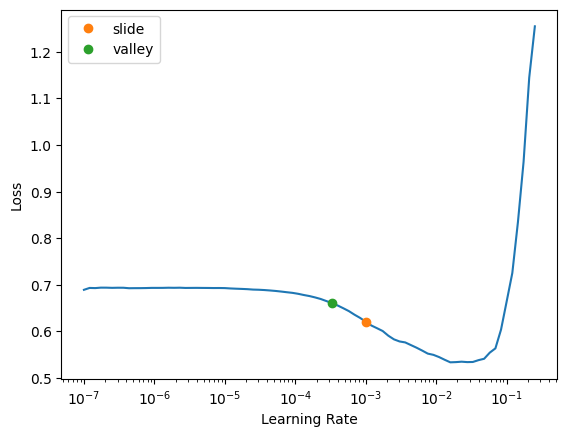

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,4.75e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.292688,0.265805,0.851908,14:41
1,0.252922,0.251478,0.864685,14:37


In [ ]:
learner.save("/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game-classifier-stage-0")

Path('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game-classifier-stage-0.pth')

In [ ]:
learner.export("/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game-classifier-stage-0.pkl")

In [ ]:
learner.unfreeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0030199517495930195, valley=2.511886486900039e-05)

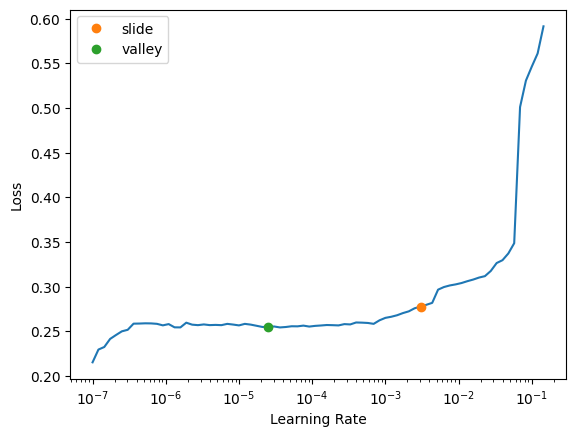

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3,slice(2.25e-5, 4.75e-4))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.255274,0.249069,0.860265,24:17
1,0.231467,0.231630,0.882844,23:41
2,0.196847,0.229699,0.881398,23:48


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
